<a href="https://www.kaggle.com/code/tolgatanrisever/transformer-and-v-t?scriptVersionId=153023422" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<div style="text-align:center">
     <font color="yellow", size="9">TRANSFORMER</font><br>
  <img src="https://media.giphy.com/media/R9zXHWAHyTjnq/giphy.gif" alt="Ortalı GIF"><br>
    
     
    Üzgünüm galila konumuz bu değil.
</div>



# TRANSFORMER ?


## <br>İÇERİK: 
* [Giriş](#1)
* [Kısa Bir Genel Bakış](#2)
* [Motivasyon](#3)
* [Transformer Mimarisi](#4)
* [Adım Adım Transformer ](#5)
    * [Multi-headed-attention mimarisi ](#6)
* [Vision Transformer Mimarisi](#7)
* [Birazda Kod ](#8)

<a id="1"></a>
## Giriş
Bu not defteri benim kendime sorduğum şu sorunun: "Nedir aceba bu Transformer ?" birden fazla yazı, makale, kaggle not defteri vs okumam ve hepsini bir araya getirip bu soruya bir cevap bulma uğraşım sonuçunda oluşmuştur.(Aslında Tez konuma başladım çok teşşekürler sevgili Hocam R.K) 

<a id="2"></a>
## Kısa Bir Genel Bakış
Vision Transformers
Görme Transformatörleri ilk olarak Ekim 2020'nin sonlarında Google Brain ekibi tarafından [AN IMAGE IS WORTH 16X16 WORDS: TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE](https://arxiv.org/pdf/2010.11929.pdf) adlı makalede tanıtıldı.
ViT'nin nasıl çalıştığını anlamak için, Transformers'ın nasıl çalıştığı ve hangi sorunları çözdüğü hakkında önceden bilgi sahibi olmanız gerekir. Elimizdeki konunun ayrıntılarına girmeden önce size transformatörlerin nasıl çalıştığını kısaca tanıtacağım - ViT.
Transformers: Kısa bir genel bakış<br>
Eğer siz sorumuzun cevabını biliyorsanız bu kısmı atlamaktan çekinmeyin.<br>
Transformer modelleri bildiğimiz Doğal Dil İşlemede gerçekten devrim yarattı. İlk tanıtıldıklarında birçok NLP rekoru kırdılar ve o zamanki Sanat Durumunu zorluyorlardı. Şimdi, modern NLP görevleri için fiili bir standart haline geldiler ve LSTM'ler ve GRU'lar gibi önceki nesil modellerle karşılaştırıldığında olağanüstü performans kazanımları getiriyorlar.

NLP ortamını dönüştüren en önemli makale ["Attention is all you need"](https://arxiv.org/pdf/1706.03762.pdf) (İhtiyacınız olan tek şey dikkat) adlı makaledir. Transformatör mimarisi bu makalede tanıtılmıştır.

<a id="3"></a>
## Motivasyon:
O dönemde dizilim ve NLP görevleri için mevcut modeller çoğunlukla RNN'leri içeriyordu. Bu ağlarla ilgili sorun, uzun vadeli bağımlılıkları yakalayamamaları idi.<br>

LSTM'ler ve GRU'lar - RNN'lerin varyantları bağımlılıkları yakalayabiliyordu ancak bu da sınırlıydı.<br>

Dolayısıyla, transformatörün arkasındaki ana ilham kaynağı bu tekrarlamadan kurtulmak ve yine de neredeyse tüm bağımlılıkları, daha doğrusu küresel bağımlılıkları yakalamaktı, evet transformatörlerin referans penceresi tam aralıklıdır. Bu, kendi kendine dikkat (çok başlı) adı verilen ve başarıları için çok önemli olan bir dikkat mekanizması çeşidi kullanılarak başarılmıştır. Tranformer modellerinin bir diğer avantajı da yüksek oranda paralelleştirilebilir olmalarıdır.<br>

<a id="4"></a>
## Transformer Mimarisi
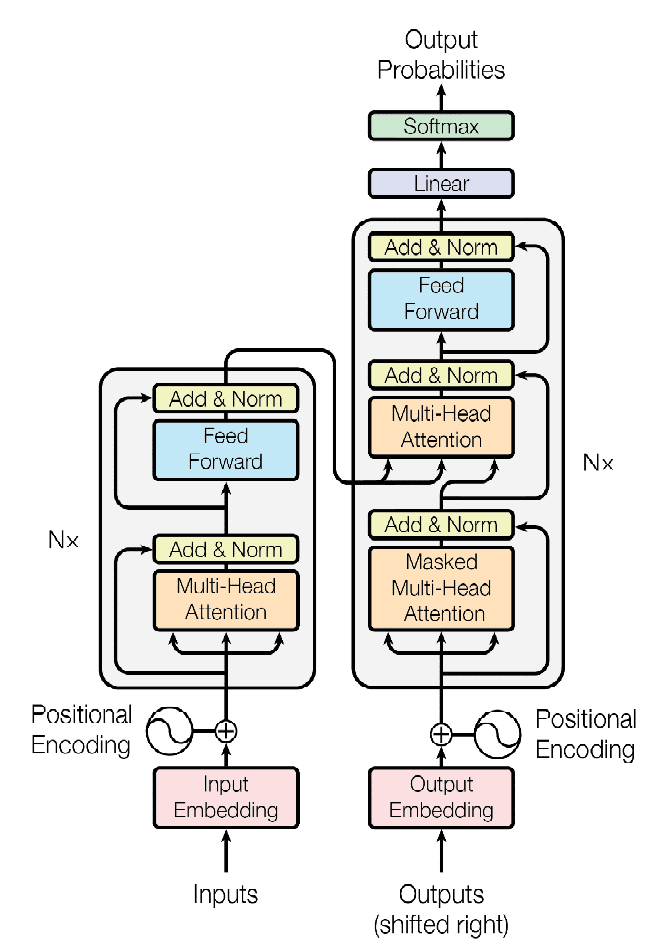


Transformatörün iki parçası vardır, yukarıdaki diyagramda sol tarafta bulunan kod çözücü ve sağ tarafta bulunan kodlayıcı.<br>
Şimdilik makine çevirisi yaptığımızı düşünün.<br>
Kodlayıcı giriş verisini (cümle) alır ve girişin bir ara temsilini üretir.<br>
Kod çözücü bu ara temsili adım adım çözer ve çıktıyı oluşturur. Ancak aradaki fark bunu nasıl yaptığıdır.<br>
Not: Buradaki açıklamalar daha çok mimarilerin arkasındaki sezgiyle ilgilidir. Daha fazla matematiksel ayrıntı için ilgili araştırma makalelerine göz atın.

<a id="5"></a>
## Adım Adım Transformer
### <font color="red" > **1-Girdi Gömme (Input Embedding):** </font><br>
Transformer'a metin verileri giriş olarak verilir. Önce, bu metin verileri gömme katmanına (embedding layer) geçirilir. Bu katman, kelimeleri veya tokenleri vektörlerle temsil eder. Her kelime, bir vektörle ifade edilir ve bu vektörler modelin girdisini oluşturur,gömme katmanı her kelime için öğrenilmiş bir vektör temsili yakalamamıza yardımcı olur.<br>
### <font color="red" >**2-Konumsal Kodlama (Positional Encoding):**</font><br>
Transformer modeli kelimelerin metindeki yerini doğrudan anlayamayaçağı için kelimelere girdi sırasında konumsal kodlama eklenir bu kelimenin yerini vektörel bir şekilde tespit etmeye yardımçı olur.<br>
### <font color="red" >**3-Encoder ve Decoder Katmanları:**</font><br>
Transformer modeli, temelde bir kodlayıcı (encoder) ve bir çözücü (decoder) tarafından oluşur. Encoder, girdi metni analiz ederken decoder, çıkışı oluşturur. Her encoder ve decoder katmanı, birden çok dikkat başlığı (attention head) ve gizli katmanlar (hidden layers) içerir(sol kısım encoder sağ kısım decoder).

<a id="6"></a>
### <font color="red" >"4-Multi-Headed-Attention & Attention Mechanism"</font>
Şimdi şu noktadayız "Multi-Headed-Attention & Attention Mechanism"<br>
<div style="text-align:center">
  <img src="https://media.giphy.com/media/oYtVHSxngR3lC/giphy.gif" alt="Ortalı GIF">
</div>




<div style="text-align:center">
  <img src="https://i.hizliresim.com/tinu5s8.png">
</div>




<font color="red" > **4.1)(Dikkat İçin Girişler:)** </font> Çok başlı dikkat öğrenilebilen vektörlerden oluşur Query(sorgu), Key(anahtar) and Value(değer) vektörleri bu vektörler işlem yapılmak istenen verileri temsil eder  sorgunuzu bir anahtarla karşılaştırılır ve bir değerle yanıt veririlir.<br>

<font color="red" > **4.2)(Benzerlik Skoru Hesaplama:)** </font> Sorgu ile anahtar arasındaki benzerlik hesaplanır ( ne kadar ilgilenemsi gerektiğini gösterir) bu benzerlik skoru sorgu kelimesinin diğer kelimeler ile ne kadar ilgilenmsi gerektiğni gösterir yüksek benzerlik yüksek ilgidir, tersi içinde tersi durum geçerlidir (yüksek benzerlik= Q ve K yüksel ilişki) bu işlem bir nokta matris çarpımıdır puan matrisi oluşmuştur.<br>

<font color="red" > **4.3)(Ağırlıklı Değer Hesaplama:)**</font>Daha sonra Puan matrisi Q ve K vektörlerinin boyutlarına göre ölçeklendirilir. Bu, çarpmanın patlayıcı etkileri olabileceğinden daha kararlı gradyanlar sağlamak içindir.<br>
Bu ölçeklendirme, sorgu kelimesinin diğer kelimeler üzerindeki etkisini gösterir. Yüksek benzerlik skorlarına sahip anahtarlar, sorgu kelimesinin sonuçta daha fazla dikkatini çeker ve değer vektörleri daha fazla vurgulanır.<br>

<font color="red" > **4.4)(Ağırlıklı Değerlerin Toplanması:)** </font>Daha sonra, dikkat puanlarını olasılıklara dönüştürmek için Puan matrisi softmax'lenir. Daha yüksek puanlar yükseltilir ve daha düşük puanlar düşürülür. Bu, modelin hangi kelimelere dikkat edeceği konusunda emin olmasını sağlar.<br>
Daha sonra elde edilen olasılıklı matris,  değer(V) vektörü ile çarpılır. Bu, modelin öğrendiği yüksek olasılık puanlarının daha önemli olmasını sağlayacaktır. Düşük skorlu kelimeler gitgide önemsiz hale gelecektir.<br>
<font color="red" > **4.5)(Çıktı:)** </font>
Daha sonra, QK ve V vektörlerinin birleştirilmiş çıktısı, daha fazla işlem yapmak için Doğrusal katmana beslenir.<br>

Dizideki her kelime için Öz Dikkat gerçekleştirilir. Biri diğerine bağlı olmadığından, öz dikkat modülünün bir kopyası her şeyi aynı anda işlemek için kullanılabilir ve bu çok başlı hale gelir.<br>




<div style="text-align:center">
    <font color="red", size="5">LAYER</font><br>
    <font color="blue", size="6">LAYER</font><br>
    <font color="yellow", size="9">LAYER</font><br>
  <img src="https://media.giphy.com/media/3ov9jEp7AkzKJf462Y/giphy.gif" alt="LAYER LAYER ">

</div>

### <font color="red" > **5-Gizli Katmanlar ve İleri Beslemeli Ağlar (Hidden Layers and Feed-Forward Networks):** </font><br>
Daha sonra çıkış değer vektörleri birleştirilir ve giriş katmanından gelen artık bağlantıya eklenir ve sonuçta elde edilen temsil normalleştirme için bir LayerNorm'a geçirilir.<br> (Artık bağlantı gradyanların ağ boyunca akmasına yardımcı olur ve LayernNorm eğitim süresini küçük bir oranda azaltmaya ve ağı stabilize etmeye yardımcı olur)<br>
Ayrıca, çıktı daha da zengin bir temsil elde etmek için noktasal ileri beslemeli bir ağa aktarılır.<br>



<font color="red" >**Gizli Katmanlar (Hidden Layers):** </font>Gizli katmanlar, verilerin işlenmesi ve temsil edilmesi için kullanılır. Bu katmanlar, özellikle dikkat mekanizması tarafından hesaplanan ilişkileri ve dönüşümleri <br>içerir. Gizli katmanlar, veri temsillerini zenginleştirir ve öğrenilen özellikleri daha iyi ifade eden vektörler oluşturur. Örneklerle açıklarsak:<br>

<font color="blue" >**Örnek 1**:</font> Bir çeviri görevinde, gizli katmanlar, kaynak dildeki kelimenin hedef dildeki kelimeyle ilişkilerini hesaplar ve çeviri sürecini yönlendirir.<br>
<font color="blue" >**Örnek 2**:</font> Bir metin sınıflandırma görevinde, gizli katmanlar, metindeki önemli özellikleri belirler ve sınıflandırma sonuçlarını etkiler.<br>

<font color="red" >**İleri Beslemeli Ağlar (Feed-Forward Networks):** </font>İleri beslemeli ağlar, gizli katmanlardan gelen temsiller üzerinde işlem yapmak için kullanılır. Bu katmanlar, vektörler üzerinde lineer dönüşümler ve <br>aktivasyon fonksiyonları uygularlar. İleri beslemeli ağlar, verileri daha yüksek boyutlu uzaylara taşır ve daha karmaşık özellikleri ifade etmeye yardımcı olur. Örneklerle açıklarsak:<br>

<font color="blue" >**Örnek 1:**</font> Bir dil modeli görevinde, ileri beslemeli ağlar, metindeki kelime sıralarını anlamak ve ardışık ilişkileri yakalamak için kullanılır.<br>
<font color="blue" >**Örnek 2:**</font> Bir görüntü işleme görevinde, ileri beslemeli ağlar, özellik haritalarını işleyerek nesneleri tanımak için kullanılır.<br>
Gizli katmanlar ve ileri beslemeli ağlar, veri temsillerinin derinleştirilmesi ve karmaşık görevlerin gerçekleştirilmesi için önemlidir.<br> Transformer modelinin her katmanı, bu bileşenleri içerir ve <br>girdi verilerini dikkat mekanizması ve diğer işlemlerle işleyerek sonuçları üretir. <br>Bu, büyük metin ve görüntü verileri üzerinde derin öğrenme yetenekleri sağlar ve birçok farklı görevde kullanılabilir.



### <font color="red" > **6-Layer Normalization (Katman Normalizasyonu):**</font><br>
Çıktılar tekrar Katman-normlu hale getirilir ve önceki katmandan artıklar eklenir. **Peki bu ne demek biraz derine inilmesi gerekli**:<br>
Derin öğrenme ve yapay sinir ağlarındaki katmanların çıktılarını normalize etmek için kullanılan bir tekniktir.<br> Bu, her bir örnekteki katman çıktılarını normalleştirmek için kullanılır ve ağın eğitim sürecini daha istikrarlı hale getirir.<br> Layer Normalization tekniği, özellikle derin sinir ağlarında, özellik çıkarma süreçlerinde veya dil işleme modellerinde kullanılan bir normalizasyon yöntemidir.

Katman normalizasyonu, batch normalizasyonundan (batch normalization) farklıdır. Batch normalization, bir mini-batch içindeki tüm örneklerin ortalaması ve varyansı alınarak normalizasyon yapar, ancak layer normalization, her bir örnek (örneğin, her bir veri noktası) için normalize edici istatistikleri hesaplar.<br>

****Layer Normalization işlemi şu adımları içerir:****<br>

Her bir örnekteki katman çıktılarının özelliklerinin hesaplanması: Her bir örnekteki katman çıktılarının özellikleri (örneğin, toplam değer, ortalama değer) hesaplanır.<br>

Normalizasyon işlemi: Hesaplanan özellikler, her bir örnek için ayrı ayrı normalleştirilir. Özellikle, çıktıların ortalaması çıkarılır, ardından varyans ile bölünerek normalleştirme gerçekleştirilir.<br>

Ölçeklendirme ve kaydırma: Normalleştirilmiş çıktılar, ölçeklendirme ve kaydırma parametreleriyle dönüştürülür. Bu, ağın öğrenme kapasitesini korumak için kullanılır.<br>

Layer Normalization, modelin eğitim sürecini daha istikrarlı hale getirir, gradyan patlaması veya kaybolması sorunlarıyla mücadele edebilir ve daha genel olarak ağın performansını artırabilir.<br>Özellikle, derin sinir ağlarının daha iyi eğitilmesine yardımcı olabilir. Bu teknik, derin öğrenme modellerinde ve özellikle dil işleme modellerinde yaygın olarak kullanılan bir normalizasyon tekniğidir.<br>

### <font color="red" > **7-Sınıflandırma ve Çıktı:**</font><br>
**Çıkış Katmanı Girişi:**<br>
Kodlayıcıdan gelen çıktı, önceki zaman adımlarından veya kelimelerden gelen girdilerle birleştirilir.<br> Bu birleştirilmiş giriş, kod çözücüye beslenir ve burada çıktılar, kodlayıcıdan gelen çıktıyla birlikte bir sonraki dikkat katmanına beslenmeden önce maskeli-çok başlı dikkat işlemine tabi tutulur.<br>

**Maskeli Çok Başlı Dikkat İşlemi:**<br>
Maskeli çok başlı dikkat, ağın kod çözme sırasında dizide daha sonra gelecek olan kelimeler hakkında herhangi bir bilgiye sahip olmamasını sağlamak için gereklidir.<br> Bu işlem, skor matrisinde dizide daha sonra gelen kelimelerin girişlerini maskeleyerek yapılır.<br> Dizideki mevcut ve önceki kelimeler 1 ile eklenirken, gelecek kelime puanları -inf ile eklenir.<br> Bu, olasılıkları elde etmek için softmax gerçekleştirirken serideki gelecek kelimelerin 0'a boğulmasını, geri kalanların ise korunmasını sağlar.<br>

**Son Adımlar ve Gradyan İyileştirmeler:**<br>
Çıkış, bir doğrusal katmana gönderilir ve olasılıkları elde etmek için softmax işlemi uygulanır.<br> Bu adımların ardından, modelin eğitimini iyileştirmek ve gradyan akışını düzenlemek için bağlantılar ve mekanizmalar kullanılır.<br>

Bu şekilde, Transformer modelinin çıkış katmanındaki işleyiş daha anlaşılır bir şekilde ifade edilmiş olur.<br>
Note:
-inf matematikte eksi sonsuzluğu ifade eder. Yani, negatif sonsuz bir değeri temsil eder.

VİT ve kodlama ile devam edeceğiz

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session